## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Project Foundation for AIML - MovieLens Data Exploration
<a id='shape'></a>

###  Load the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Import data files as data frames 

Read in 'movie rating' data as ratings dataframe:

In [2]:
r_col = ['user_id','movie_id','rating','unix_timestamp']
ratings = pd.read_csv('u.data', sep = '\t', names = r_col)
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Read in 'movie' data as movies dataframe:

In [3]:
m_col = ['movie_id','title','release_date','video_release_date','IMBd_URL','unknown','Action','Adventure','Animation',' Childrens', 'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci-Fi','Thriller','War','Western']
movies = pd.read_csv('u.item', sep = '|', names = m_col, encoding="ISO-8859-1")
movies.head()

,movie_id,title,release_date,video_release_date,IMBd_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Read in 'user' data as users dataframe:

In [4]:
u_col = ['user_id','age','gender','occupation','zip_code']
users = pd.read_csv('u.user', sep = '|', names = u_col)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Data Quality Checks

Check for null values that may compromise analysis:

In [5]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [6]:
ratings.isnull().sum()

user_id           0
movie_id          0
rating            0
unix_timestamp    0
dtype: int64

In [7]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             1
video_release_date    1682
IMBd_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
 Childrens               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

Release date is an important field for our EDA, therefore need to investigate the movie row with the missing 'NaN' release date:
- First locate the missing NaN release_date value:

In [8]:
nan_rows = movies[movies['release_date'].isnull()]
nan_rows

,movie_id,title,release_date,video_release_date,IMBd_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Confirm i am able to drop the NaN release date value as no important data is being stored for the row:

In [9]:
movies = movies.drop(movies.index[266])

In [10]:
movies.isnull().sum()

movie_id                 0
title                    0
release_date             0
video_release_date    1681
IMBd_URL                 2
unknown                  0
Action                   0
Adventure                0
Animation                0
 Childrens               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [11]:
users.shape

(943, 5)

In [12]:
movies.shape

(1681, 24)

In [13]:
ratings.shape

(100000, 4)

### Merge dataframes to consolidate into one central dataframe: 
Merge Movies and Ratings data frames:

In [14]:
movie_ratings = pd.merge(movies,ratings,on='movie_id')
movie_ratings.head()

,movie_id,title,release_date,video_release_date,IMBd_URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,4,877019411
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,4,891700426
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,3,883601324


Merge Movie_Ratings and Users data frames:

In [15]:
movie_data_consol = pd.merge(movie_ratings, users)
movie_data_consol.head()

,movie_id,title,release_date,video_release_date,IMBd_URL,unknown,Action,Adventure,Animation,Childrens,...,Thriller,War,Western,user_id,rating,unix_timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,1,0,0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,308,5,887736696,60,M,retired,95076


In [16]:
movie_data_consol.isnull().sum()

movie_id                  0
title                     0
release_date              0
video_release_date    99991
IMBd_URL                  4
unknown                   0
Action                    0
Adventure                 0
Animation                 0
 Childrens                0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
user_id                   0
rating                    0
unix_timestamp            0
age                       0
gender                    0
occupation                0
zip_code                  0
dtype: int64

 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Univariate Analysis
### Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

#### Univariate plot of the movie 'rating' attribute from the movie dataframe: 

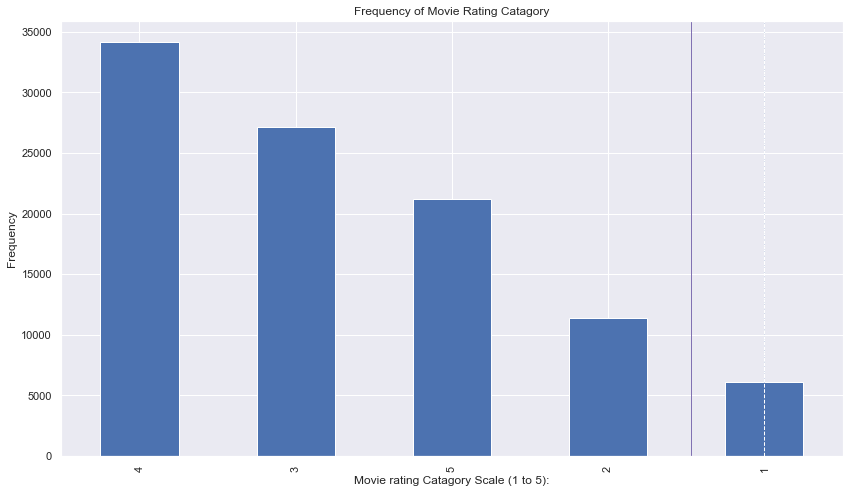

In [17]:
rt = ratings['rating'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency of Movie Rating Catagory")
rt.set_xlabel("Movie rating Catagory Scale (1 to 5):")
rt.set_ylabel("Frequency")

plt.axvline(ratings['rating'].mean(), color='m', linewidth=1)
plt.axvline(ratings['rating'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(ratings['rating'].mode()[0], color='w', linestyle='dashed', linewidth=1)

plt.show()

Perform the same analysis but group by movie title to eliminate duplicate ratings per movie

In [18]:
rate = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
rate['Number of ratings per movie'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())
rate.head()

,rating,Number of ratings per movie
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


This is how the number of ratings distribution looks:

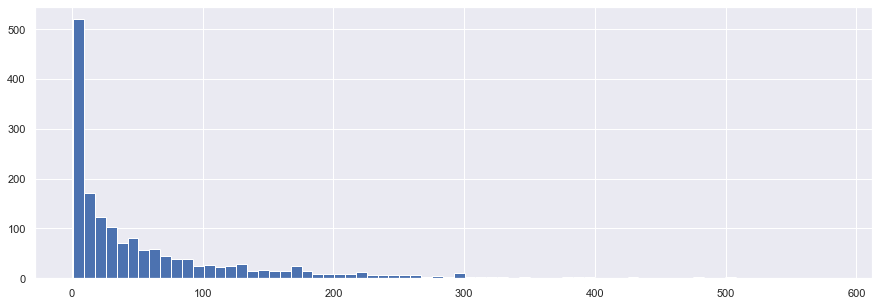

In [19]:
plt.figure(figsize=(15,5))
rate['Number of ratings per movie'].hist(bins=70)
plt.show()

This is how the average of ratings distribution looks:

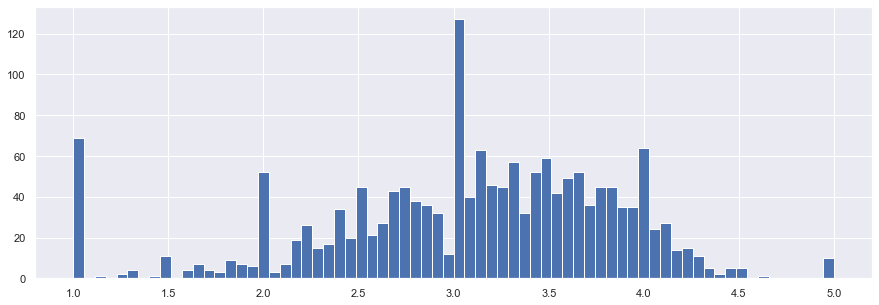

In [20]:
plt.figure(figsize=(15,5))
rate['rating'].hist(bins=70)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


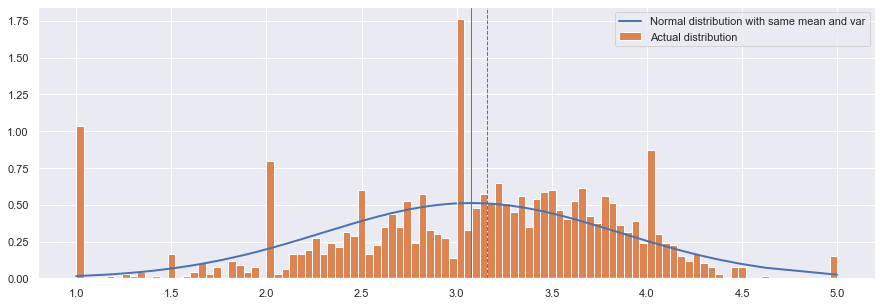

In [21]:
#convert pandas DataFrame object to numpy array and sort
r = np.asarray(rate['rating'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(rate['rating'].mean(), color='r', linewidth=1)
plt.axvline(rate['rating'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(rate['rating'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

Univariate plot of the users movie 'rating' catagory from the MovieLens data (Histogram Data):

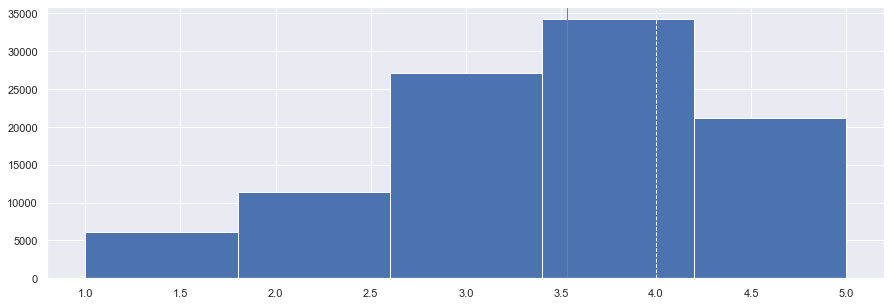

In [22]:
plt.figure(figsize=(15,5))
plt.hist(ratings['rating'],bins = 5)
plt.axvline(ratings['rating'].mean(), color='m', linewidth=1)
plt.axvline(ratings['rating'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(ratings['rating'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()

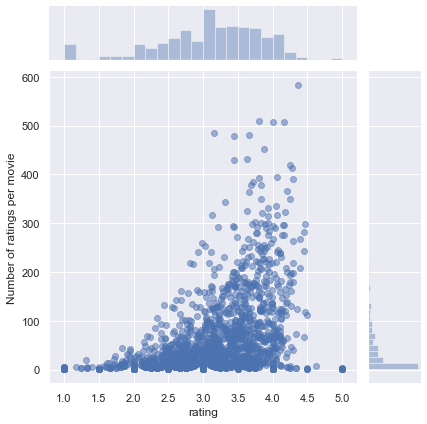

In [23]:
sns.jointplot(x='rating', y='Number of ratings per movie', data = rate, alpha=0.5)
plt.show()

##### Analysis movie rating data:
Some more features of indexing includes 
- From the above analysis we can see the majority of 'Movie Viewer(s) give ratings between 3 and 4 
- There are some outliers, however the movie 'ratings' data mostly follows a normal distribution.

Key attributes: 
- Mean ('rating'): 3.53
- Mode ('rating'): 4
- Median ('rating'): 4
- Std Dev ('rating'): 1.12
- Max ('rating'): 5
- Min ('rating'): 1

#### Univariate plot of the users 'age' attribute from the users dataframe:

Univariate plot of the users 'age' from the MovieLens data:

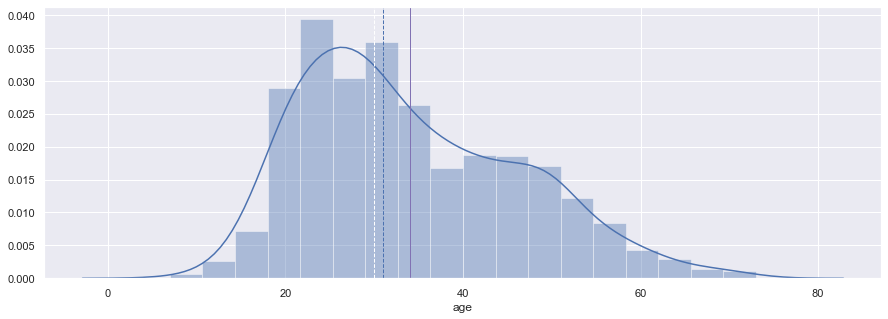

In [24]:
plt.figure(figsize=(15,5))
sns.distplot(users['age'])
plt.axvline(users['age'].mean(), color='m', linewidth=1)
plt.axvline(users['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(users['age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()

Univariate plot of the users 'age' from the MovieLens data (Histogram):

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


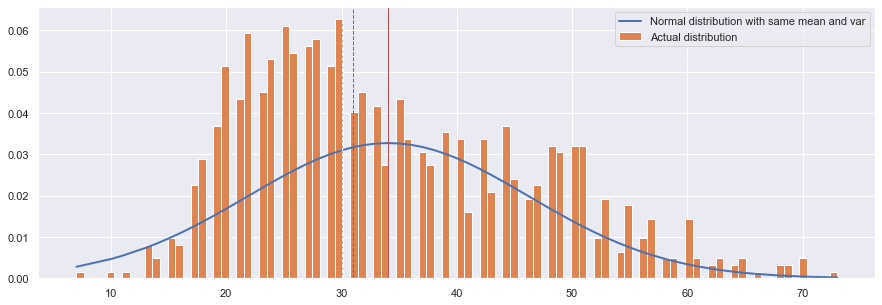

In [25]:
#convert pandas DataFrame object to numpy array and sort
s = np.asarray(users['age'])
s = sorted(s)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(s, np.mean(s), np.std(s)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(s,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(s,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(users['age'].mean(), color='r', linewidth=1)
plt.axvline(users['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(users['age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

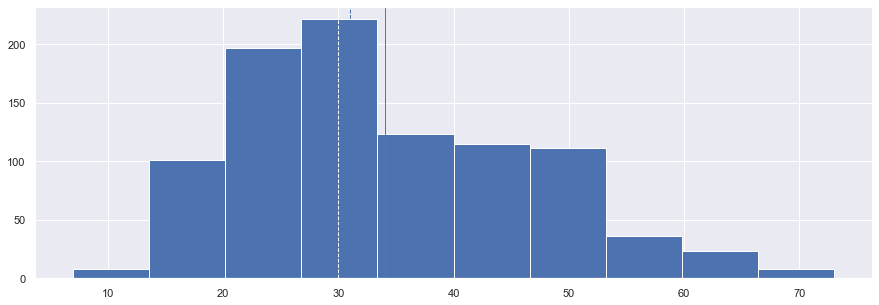

In [26]:
plt.figure(figsize=(15,5))
plt.hist(users['age'])
plt.axvline(users['age'].mean(), color='r', linewidth=1)
plt.axvline(users['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(users['age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()

##### Analysis user(s) age data:
Users tend to be mostly in the late teens and mid-thirties, though there seems to be another peak the occurs in the late forties. There is very little data on movie viewer(s) above the age of 65 and below the age of 10, we will not be able to say anything about these groups with very much confidence. 

The distribution of age is slightly skewed towards the younger mid-twenty age group.

Key attributes: 
1. Mean ('age'): 34
2. Mode ('age'): 30
3. Median ('age'): 31
3. Std Dev ('age'): 12.19
3. Max ('age'): 73
3. Min ('age'): 7


#### Univariate plot of the users 'gender' attribute from the users dataframe:

In [27]:
users['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

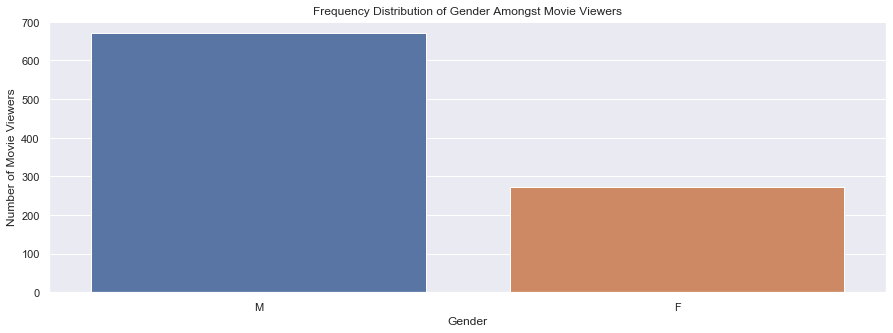

In [28]:
gender_count = users['gender'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(gender_count.index, gender_count.values)
plt.title('Frequency Distribution of Gender Amongst Movie Viewers')
plt.ylabel('Number of Movie Viewers')
plt.xlabel('Gender')
plt.show()

##### Analysis user(s) gender data:
• Males make up of more of our Movie Viewers sample.

#### Univariate plot of the users 'occupation' attribute from the users dataframe:

Investigate the Movie Viewers with respect to profession that contributed to the dataset

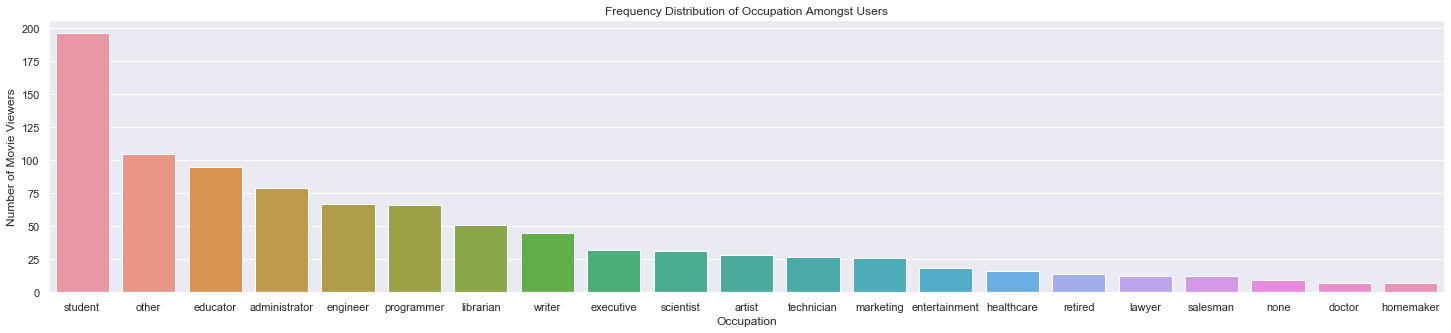

In [29]:
occupation_count = users['occupation'].value_counts()
plt.figure(figsize=(25,5))
sns.barplot(occupation_count.index, occupation_count.values)
plt.title('Frequency Distribution of Occupation Amongst Users')
plt.ylabel('Number of Movie Viewers')
plt.xlabel('Occupation')
plt.show()

##### Analysis user(s) Occupational data:
- Students consist of the majortiy of our Movie Viewers sample.
- There are very few doctors and homemakers, we probably can't say anything about these groups with very much confidence

 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Genre by Year

Adding a release_year column to the movies dataframe:

In [30]:
release_year = (movies['release_date'].str.split('-').str[2])
movies['release_year'] = release_year
movies

,movie_id,title,release_date,video_release_date,IMBd_URL,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994


In [31]:
movies[['release_year','Action','Adventure','Animation',' Childrens', 'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci-Fi','Thriller','War','Western']].groupby(['release_year']).sum()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


Visualize how popularity of Genres has changed over the years. From the graph one should be able to see for any given year, movies of which genre got released the most:

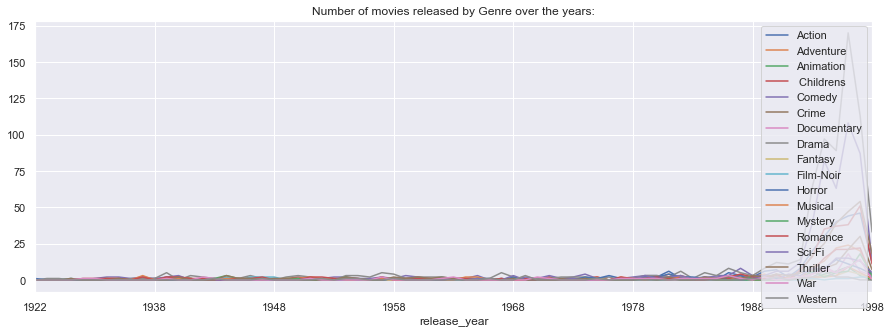

In [32]:
movies[['release_year','Action','Adventure','Animation',' Childrens', 'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical', 'Mystery', 'Romance','Sci-Fi','Thriller','War','Western']].groupby(['release_year']).sum().plot(figsize=(15,5)
, title = 'Number of movies released by Genre over the years:')

plt.show()

##### Analysis of genre by release year data:
- Most movies in the data tend to be from the 1990's. 
- There is a large range in movie release dates, meaning they have at least some moves from the past. 

 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Top Rated Movies

### Display the top 25 movies by average rating, as a list/series/dataframe.

Create a table of average movie ratings with count of ratings (sorted by rating average ['mean'], then by count of number of ratings ['size']:

In [33]:
movie_stats = movie_ratings.groupby('title').agg({'rating': [np.size, np.mean]}).sort_values([('rating', 'mean')], ascending=False)
movie_stats.head()

rating     
                                             size mean
title                                                 
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Star Kid (1997)                                 3  5.0
Prefontaine (1997)                              3  5.0
Aiqing wansui (1994)                            1  5.0
Santa with Muscles (1996)                       2  5.0

Consider only the movies which received atleast a 100 ratings:

In [34]:
movie_atleast100 = movie_stats['rating']['size'] >= 100
movie_stats[movie_atleast100].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Verify the following statements:
  

- Men watch more drama than women
- Men watch more Romance than women
- Women watch more Sci-Fi than men

### Men watch more drama than women

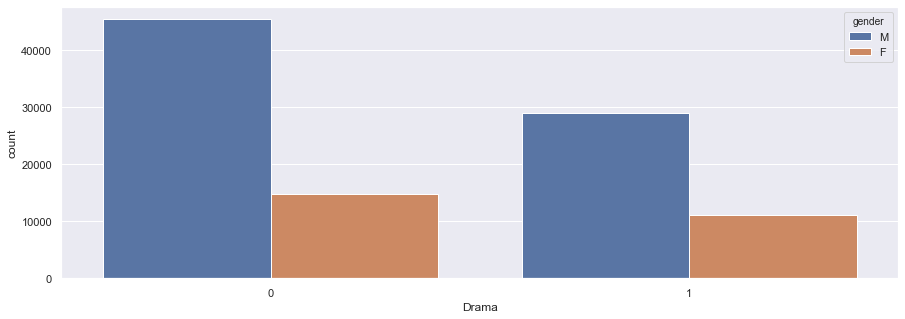

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=movie_data_consol, hue ='gender', x= 'Drama')
plt.show()

#### Observations:
- Males make up of more of our sample. 
- Proportionately Woman seem to watch more 'Drama' movies than Men.

Conclusion:
  
The statement Men watch more 'Drama' than Men does not appear true.


### Men watch more Romance than women

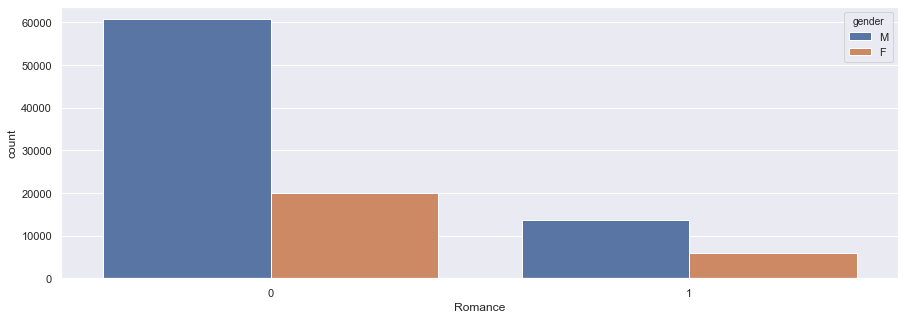

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data=movie_data_consol, hue='gender', x= 'Romance')
plt.show()

#### Observations:
- Males make up of more of our sample. 
- Proportionately Woman seem to watch more 'Romance' movies than Men.

Conclusion:
  
The statement Men watch more 'Romance' than Men does not appear true.


### Women watch more Sci-Fi than men

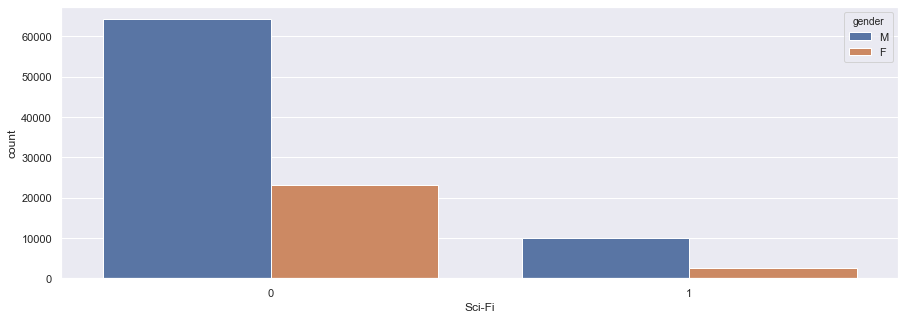

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data=movie_data_consol,x='Sci-Fi',hue='gender')
plt.show()

#### Observations:
- Males make up of more of our sample. 
- Proportionately Woman seem to watch more 'Drama' movies than Men.

Conclusion:
  
The statement Men watch more 'Drama' than Men does not appear true.
